# Group C7 - Finding features which are strongly correlated with heart disease

### Step 1. Setting up

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Reading in the data
df = pd.read_csv('./datasets/BRFSS2015_cleaned.csv')
df.head()

,HeartDisease,HighBP,HighChol,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,...,NoDocBcCost,LastCheckup,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,4.0,1.0,18.0,15.0,1.0,0.0,9.0,4.0,2.0
1,0.0,0.0,0.0,25.0,3.0,0.0,0.0,2.0,0.0,0.0,...,1.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,4.0,1.0,30.0,30.0,1.0,0.0,9.0,4.0,5.0
3,0.0,1.0,0.0,27.0,0.0,0.0,0.0,3.0,1.0,1.0,...,0.0,4.0,4.0,0.0,0.0,0.0,0.0,11.0,3.0,4.0
4,0.0,1.0,1.0,24.0,0.0,0.0,0.0,3.0,1.0,1.0,...,0.0,4.0,4.0,3.0,0.0,0.0,0.0,11.0,5.0,2.0


### Step 2. Finding the highest absolute correlations

In [3]:
pairwise_correlations = df.corr()
corr_target = pairwise_correlations["HeartDisease"].sort_values(ascending=False)[1:]
print(corr_target)

Age             0.221903
DiffWalk        0.212788
HighBP          0.209104
Stroke          0.201416
PhysHlth        0.180766
HighChol        0.180709
Diabetes        0.180333
Sex             0.086846
Smoker          0.079474
MentHlth        0.064147
LastCheckup     0.056367
BMI             0.053326
NoDocBcCost     0.030192
Healthcare      0.019100
Fruits         -0.020066
HvyDrinking    -0.028971
Veggies        -0.038988
PhysActivity   -0.058593
Education      -0.099420
Income         -0.137396
GenHlth        -0.257664
Name: HeartDisease, dtype: float64


Above we can see the correlations between features and the target variable. Now lets see, which absolute correlations are the strongest.

In [4]:
corr_abs = corr_target.copy()
for i in range(len(corr_abs)):
    corr_abs[i] = abs(corr_target[i])
corr_abs = corr_abs.sort_values(ascending=False)
print(corr_abs)

GenHlth         0.257664
Age             0.221903
DiffWalk        0.212788
HighBP          0.209104
Stroke          0.201416
PhysHlth        0.180766
HighChol        0.180709
Diabetes        0.180333
Income          0.137396
Education       0.099420
Sex             0.086846
Smoker          0.079474
MentHlth        0.064147
PhysActivity    0.058593
LastCheckup     0.056367
BMI             0.053326
Veggies         0.038988
NoDocBcCost     0.030192
HvyDrinking     0.028971
Fruits          0.020066
Healthcare      0.019100
Name: HeartDisease, dtype: float64


Based on our data, the top 5 features which are directly connected to heart disease are:
* 1. GenHlth — People who said that in general their health is bad are more likely to have heart disease.
* 2. Age — Older people are more likely to have heart disease.
* 3. Diffwalk — People who have serious difficulty walking or climbing stairs are more likely to have heart disease.
* 4. HighBP — People who have been told that they have high blood pressure by a doctor, nurse, or other health professional are more likely to have heart disease.
* 5. Stroke — People who have ever had a stroke are more likely to have heart disease.

### Step 3. Visualizing

Now we will be visualizing the correlations between each feature and the target variable by creating some plots.

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use("ggplot") #Default plot style

**a. Strongest correlations**

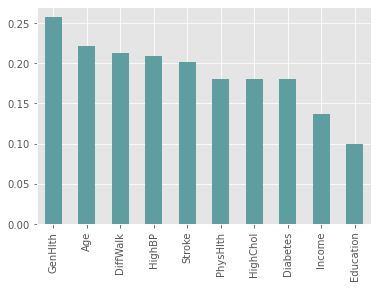

In [6]:
corr_abs_top10 = corr_abs[0:10]
corr_abs_top10.plot.bar(color="cadetblue")
plt.show()

**b. General health and heart disease**

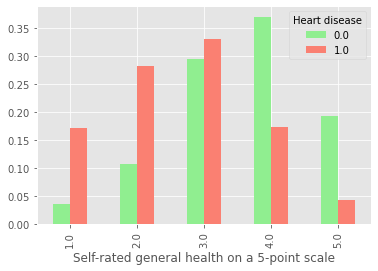

In [7]:
df.groupby('HeartDisease').GenHlth.value_counts(normalize=True).unstack(0).plot.bar(color=["lightgreen", "salmon"])
plt.xlabel("Self-rated general health on a 5-point scale")
plt.legend(loc="upper right", title="Heart disease")

**c. Age and heart disease**

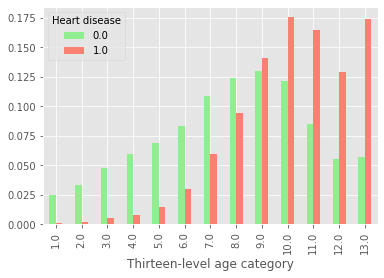

In [8]:
df.groupby('HeartDisease').Age.value_counts(normalize=True).unstack(0).plot.bar(color=["lightgreen", "salmon"])
plt.xlabel("Thirteen-level age category")
plt.legend(loc="upper left", title="Heart disease")

**d. Difficulty walking and heart disease**

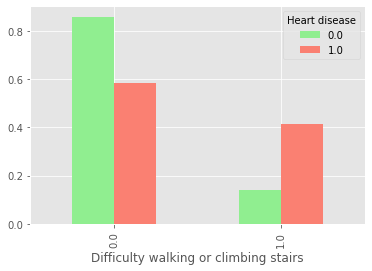

In [9]:
df.groupby('HeartDisease').DiffWalk.value_counts(normalize=True).unstack(0).plot.bar(color=["lightgreen", "salmon"])
plt.xlabel("Difficulty walking or climbing stairs")
plt.legend(loc="upper right", title="Heart disease")

**e) High blood-pressure and heart disease**

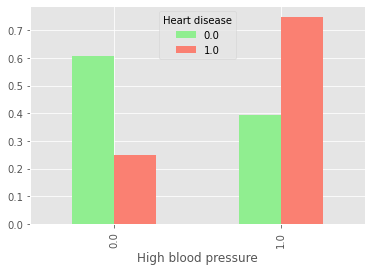

In [10]:
df.groupby('HeartDisease').HighBP.value_counts(normalize=True).unstack(0).plot.bar(color=["lightgreen", "salmon"])
plt.xlabel("High blood pressure")
plt.legend(loc="upper center", title="Heart disease")

**f) Stroke and heart disease**

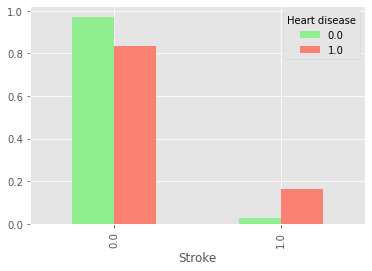

In [11]:
df.groupby('HeartDisease').Stroke.value_counts(normalize=True).unstack(0).plot.bar(color=["lightgreen", "salmon"])
plt.xlabel("Stroke")
plt.legend(loc="upper right", title="Heart disease")

**g) Physical health and heart disease**

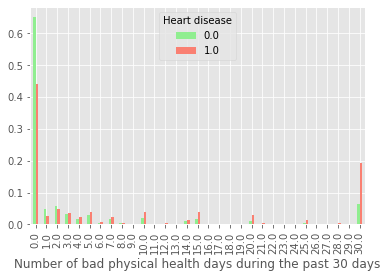

In [12]:
df.groupby('HeartDisease').PhysHlth.value_counts(normalize=True).unstack(0).plot.bar(color=["lightgreen", "salmon"])
plt.xlabel("Number of bad physical health days during the past 30 days")
plt.legend(loc="upper center", title="Heart disease")

This plot is not the best visually, but people who said that during the past 30 days their health was not good for more than two days more likely had heart disease.

**h) High cholesterol and heart disease**

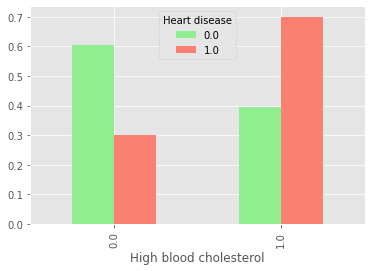

In [13]:
df.groupby('HeartDisease').HighChol.value_counts(normalize=True).unstack(0).plot.bar(color=["lightgreen", "salmon"])
plt.xlabel("High blood cholesterol")
plt.legend(loc="upper center", title="Heart disease")

More than 60% of people who have been told by a professional that their cholesterol is high also have heart disease.

**i) Diabetes and heart disease**

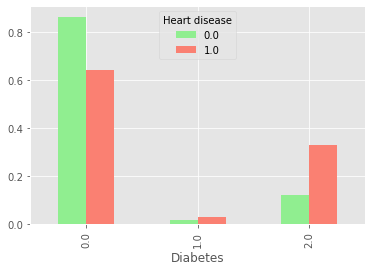

In [14]:
df.groupby('HeartDisease').Diabetes.value_counts(normalize=True).unstack(0).plot.bar(color=["lightgreen", "salmon"])
plt.xlabel("Diabetes")
plt.legend(loc="upper center", title="Heart disease")

0 — no diabetes or diabetes only during pregnancy, 1 — pre-diabetes or borderline diabetes, 2 — yes diabetes

**j) Income and heart disease**

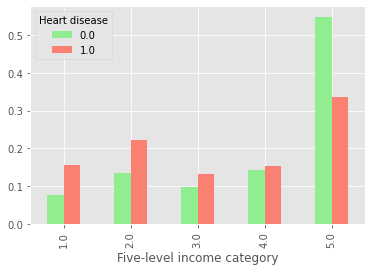

In [15]:
df.groupby('HeartDisease').Income.value_counts(normalize=True).unstack(0).plot.bar(color=["lightgreen", "salmon"])
plt.xlabel("Five-level income category")
plt.legend(loc="upper left", title="Heart disease")

People on lower incomes (less than $50,000) are more likely to have heart disease.